# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
# EDA Question 1A solution below:
unique_count = north_df['Rep ID'].nunique()
print("Number of unique IDs:", unique_count)

Number of unique IDs: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
# EDA Question 1B solution Below:
unique_count = south_df['Rep ID'].nunique()
print("Number of unique IDs:", unique_count)

Number of unique IDs: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [8]:
# EDA Question 2A solution Below:
average_busy_minutes = round(north_df['Busy Minutes'].mean(), 2)
average_not_ready_minutes = round(north_df['Not Ready Minutes'].mean(), 2)
average_incoming_wait_time = round(north_df['Incoming Wait Time'].mean(), 2)
average_during_call_wait_time = round(north_df['During Call Wait Time'].mean(), 2)


print("Average Busy Minutes:", average_busy_minutes)
print("Average Not Ready Minutes:", average_not_ready_minutes)
print("Average Incoming Wait Time:", average_incoming_wait_time)
print("Average During Call Wait Time:", average_during_call_wait_time)

Average Busy Minutes: 9.99
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.05
Average During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
# EDA Question 2B solution Below:
average_busy_minutes = round(south_df['Busy Minutes'].mean(), 2)
average_not_ready_minutes = round(south_df['Not Ready Minutes'].mean(), 2)
average_incoming_wait_time = round(south_df['Incoming Wait Time'].mean(), 2)
average_during_call_wait_time = round(south_df['During Call Wait Time'].mean(), 2)


print("Average Busy Minutes:", average_busy_minutes)
print("Average Not Ready Minutes:", average_not_ready_minutes)
print("Average Incoming Wait Time:", average_incoming_wait_time)
print("Average During Call Wait Time:", average_during_call_wait_time)

Average Busy Minutes: 10.05
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.0
Average During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [11]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_df, south_df], ignore_index=True)

calls_per_time_block = combined_df.groupby('Time Block')['Calls'].sum()

print(calls_per_time_block)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [4]:
# Question 1 solution below

#### Record your answer below:

> Your Answer:

We do have missing data. In the North csv, we are missing a lot of Incoming Wait Times. This is the same for the South csv. For this instance, I would probably just set these values to 0, because Outgoing calls don't have an Incoming Wait Time, thus these values should be 0. Also for numerical purposes, it doesn't make sense to set them to "FALSE", and removing them could hurt our other stats where these rows have other data. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [14]:
# Cleaning Question 2 solution below:
north_df['Sale'] = north_df['Sale'].str.strip()
unique_values = north_df['Sale'].unique()


print(unique_values)

['NO' 'YES']


##### Record your answer by below:
> Your Answer:
>
> I rectified the issue because having two values for Yes can only cause us problems. To do this, I used str.strip() to remove the trailing spaces from the Sale column. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [9]:
# Cleaning Question 3 solution below:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df,south_df], ignore_index=True)

duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")




No duplicates found.


##### Record your answer below:
> Your Answer:

Based on my code, there were no duplicates present. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: I personally did not find any of the provided data to stand out as unnecessary. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [25]:
# Create dataframe for the entire company named df
df = pd.concat([north_df,south_df], ignore_index=True)

print("Combined DataFrame")
print(df)


Combined DataFrame
     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
554         309  South  Product Support    5:00 PM             Outgoing     D   
555         310  South  Product Support    5:00 PM             Outgoing     C   
556         311  South  Product Support    5:00 PM             Outgoing     C   
557         312  South  Product Support    5:00 PM             Outgoing     C   
558         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [29]:
# Manipulation Question solution below:
grouped_df = df.groupby(['Branch','Rep ID'], as_index=False)['Calls'].sum()
sorted_df = grouped_df.sort_values(by=['Branch', 'Calls'], ascending=[True, False])

print("Sorted Calls by Rep ID in Each Branch:")
print(sorted_df)

Sorted Calls by Rep ID in Each Branch:
   Branch  Rep ID  Calls
2   North   Brent     37
6   North   Lilly     30
4   North    Duke     29
7   North    Todd     29
5   North     Joe     26
3   North     Cam     24
8   North  Xander     24
0   North  Amanda     23
1   North    Andy     23
10  South    Eric     35
16  South   Randy     33
17  South   Sandy     32
12  South   Helga     31
11  South  George     29
15  South    Kate     29
14  South    Karl     28
13  South    Josh     26
19  South   Susan     26
18  South  Sharon     25
9   South   Alice     20


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [8]:
# Manipulation Question 2 solution below
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df,south_df], ignore_index=True)
average_abandoned_call_north = north_df.groupby('Branch')['Abandoned'].mean()
average_abandoned_call_south = south_df.groupby('Branch')['Abandoned'].mean()
average_abandoned_call_company = df['Abandoned'].mean()

print('Average Abandoned Calls at North Branch')
print(average_abandoned_call_north)
print('Average Abandoned Calls at South Branch')
print(average_abandoned_call_south)
print('Average Abandoned Calls for Whole Company')
print(average_abandoned_call_company)

Average Abandoned Calls at North Branch
Branch
North    0.028571
Name: Abandoned, dtype: float64
Average Abandoned Calls at South Branch
Branch
South    0.012739
Name: Abandoned, dtype: float64
Average Abandoned Calls for Whole Company
0.01967799642218247


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? South and Company as a whole both fail to fall in the 2-5% range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [69]:
# Manipulation Question 3 solution below:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df,south_df], ignore_index=True)
incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']
quick_calls_incoming = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2.0].count()
quick_calls_north = north[north["Incoming Wait Time"] <= 2.0].count()
quick_calls_south = south[south["Incoming Wait Time"] <= 2.0].count()
total_quick_calls = quick_calls_north + quick_calls_south
total_north = north_df[north_df['Incoming or Outgoing'] == 'Incoming']['Calls'].count()
total_south = south_df[south_df['Incoming or Outgoing'] == 'Incoming']['Calls'].count()
total_company = incoming_calls['Calls'].count()

percent_north = (quick_calls_north / total_north * 100) if total_north > 0 else 0
percent_south = (quick_calls_south / total_south * 100) if total_south > 0 else 0
percent_total_company = (total_quick_calls / total_company * 100) if total_company > 0 else 0

print(percent_north)
print(quick_calls_north)
print(total_north)
print(percent_south)
print(quick_calls_south)
print(total_south)
print(percent_total_company)
print(total_quick_calls)
print(total_company)
    



Unnamed: 0               40.243902
Branch                   40.243902
Call Purpose             40.243902
Time Block               40.243902
Incoming or Outgoing     40.243902
Queue                    40.243902
Rep ID                   40.243902
Sale                     40.243902
Lost Call                40.243902
Abandoned                40.243902
Busy Minutes             40.243902
Not Ready Minutes        40.243902
Incoming Wait Time       40.243902
During Call Wait Time    40.243902
Calls                    40.243902
dtype: float64
Unnamed: 0               33
Branch                   33
Call Purpose             33
Time Block               33
Incoming or Outgoing     33
Queue                    33
Rep ID                   33
Sale                     33
Lost Call                33
Abandoned                33
Busy Minutes             33
Not Ready Minutes        33
Incoming Wait Time       33
During Call Wait Time    33
Calls                    33
dtype: int64
82
Unnamed: 0              

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with 33 calls
- South Branch = 38.10% with 48 calls
- Company Wide = 38.94% with 81 calls


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [2]:
# Manipulation Question 4 solution below:
import pandas as pd

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df, south_df], ignore_index=True)

average_wait_time_by_branch = df.groupby('Branch')['Incoming Wait Time'].mean().reset_index()

average_wait_time_overall = df['Incoming Wait Time'].mean()

print("Average Incoming Wait Time by Branch:")
print(average_wait_time_by_branch)
print("\nAverage Incoming Wait Time for the Entire Company:")
print(average_wait_time_overall)


Average Incoming Wait Time by Branch:
  Branch  Incoming Wait Time
0  North             3.04878
1  South             3.00000

Average Incoming Wait Time for the Entire Company:
3.019230769230769


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3 seconds 
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/3q/89j1fbhn3535fsc60pr_c_xw0000gn/T/ipykernel_9732/202932448.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


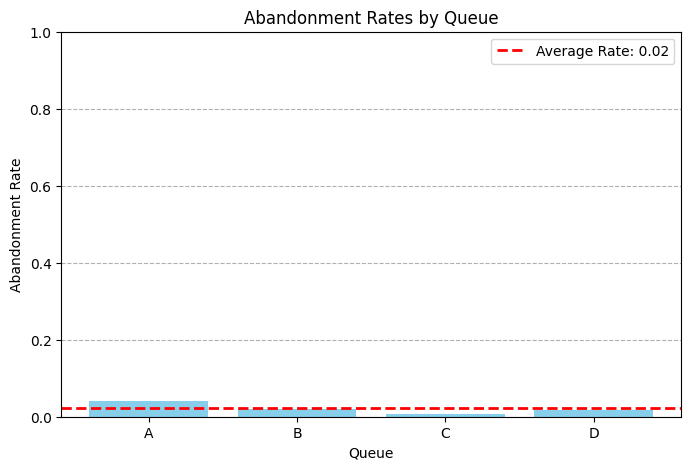

0.021523181552908718


In [31]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import matplotlib.pyplot as plt

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df,south_df], ignore_index=True) 

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
abandonment_df = pd.DataFrame(list(abandonment_rates.items()), columns=['Queue', 'Abandonment Rate'])

average_rate = abandonment_df['Abandonment Rate'].mean()

plt.figure(figsize=(8, 5))
plt.bar(abandonment_df['Queue'], abandonment_df['Abandonment Rate'], color='skyblue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.title('Abandonment Rates by Queue')
plt.ylim(0, 1)
plt.axhline(average_rate, color='red', linewidth=2, linestyle='--', label=f'Average Rate: {average_rate:.2f}')
plt.legend()

plt.grid(axis='y', linestyle='--')
plt.show()

print(average_rate)



##### Record your answer below:

> Chart style you chose and why: I used a bar chart because I like the layout, and how it gives a quick visual into the group totals, as well as an average line. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Calls_x  Calls_y  Service Level %  Average Speed of Answer
0  Amanda        3        5        60.000000                 2.400000
1    Andy        3       10        30.000000                 3.600000
2   Brent        6        8        75.000000                 2.125000
3     Cam        5       11        45.454545                 2.909091
4    Duke        6       14        42.857143                 2.785714
5     Joe        2       10        20.000000                 3.600000
6   Lilly        4       12        33.333333                 3.083333
7    Todd        2        6        33.333333                 3.500000
8  Xander        2        6        33.333333                 3.333333


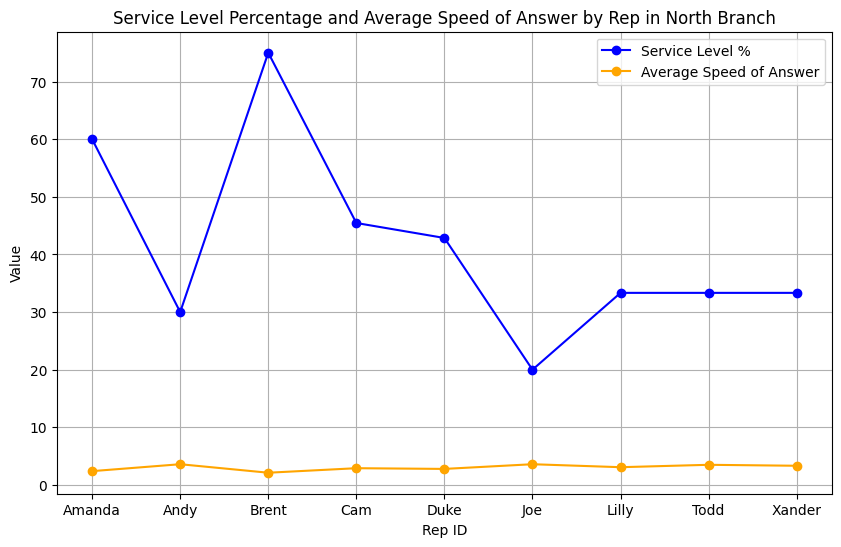

In [12]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
import pandas as pd
import matplotlib.pyplot as plt

north = pd.read_csv('NorthCallCenter.csv')
south = pd.read_csv('SouthCallCenter.csv')

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
average_wait_time = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
average_wait_time.rename(columns={"Incoming Wait Time": "Average Speed of Answer"}, inplace=True)

final_stats = pd.merge(service_level, average_wait_time, on="Rep ID")
print(final_stats)

plt.figure(figsize=(10, 6))
plt.plot(final_stats['Rep ID'], final_stats['Service Level %'], marker='o', label='Service Level %', color='blue')
plt.plot(final_stats['Rep ID'], final_stats['Average Speed of Answer'], marker='o', label='Average Speed of Answer', color='orange')
plt.xlabel('Rep ID')
plt.ylabel('Value')
plt.title('Service Level Percentage and Average Speed of Answer by Rep in North Branch')
plt.legend()
plt.grid()

plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a line chart. While it isn't showing anything over the course of time, I find it a little easier to look at for my eyes, especially when distinguishing the different values. Also I had some trouble with my bar chart I was attempting. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Incoming or Outgoing  Incoming  Outgoing
Call Purpose                            
Complaint                   51         0
Product Support             82       228
Sales Support               75       123
Incoming or Outgoing  Incoming  Outgoing
Call Purpose                            
Complaint                   51         0
Product Support             82       228
Sales Support               75       123


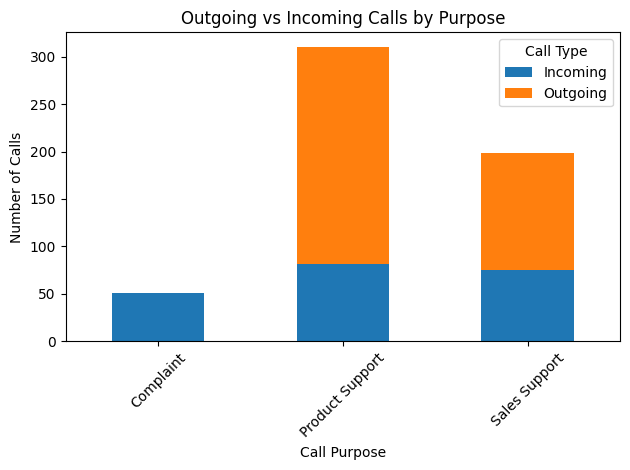

In [5]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
import pandas as pd
import matplotlib.pyplot as plt

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.concat([north_df, south_df], ignore_index=True)

purpose_group = df.groupby("Call Purpose")
purpose_counts = df.groupby(['Call Purpose', 'Incoming or Outgoing']).size().unstack(fill_value=0) # note-to-self per Stackoverflow: we can apply unstack to pivot by default the right-most (last) index level as columns to generate a DataFrame
call_purpose = ["Complaint", "Product Support", "Sales Support"]
#purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

#complaints = purpose_counts["Complaint"].to_dict() 
#sales_support = purpose_counts["Sales Support"].to_dict()
#product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
print(purpose_counts)

purpose_counts.plot(kind='bar', stacked=True)
plt.title('Outgoing vs Incoming Calls by Purpose')
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend(title='Call Type')
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I used another bar chart, I just prefer the visual aid they provide. That and I struggled so hard getting anything else to work, I initially wanted a line chart but that was proving useless. D: 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:

I personally think the South branch is doing better. They have a lower call abandonment rate, a shorter incoming wait time, and while the % answered within two seconds is lower at the South branch, they have more total calls they are counting against, so the difference doesn't seem as big.  




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:

I think I would give the extra help to the North branch. They have fewer reps already, are a bit slower slower to answer (by .5 of a second) and also have a higher call abandonment percentage.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 

Nothing I wish I had, however I wish the data had been presented in a way that would make it easier to perform multiple stats in one sweep. Having seconds as a decimal or something as opposed to "1" when other fields use "1" as minutes. 

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined